In [1]:
import numpy as np

import pandas as pd 

pre processing

In [2]:
#read data 
df=pd.read_csv('C:/Users/HP/OneDrive/Desktop/mm/Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head(888 )

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
883,1,CASH_OUT,59390.46,C100445376,0.0,0.00,C977993101,73791.34,965870.05,0,0
884,1,CASH_OUT,131991.26,C1396385390,0.0,0.00,C1971489295,1145221.51,0.00,0,0
885,1,CASH_OUT,65025.30,C114414807,0.0,0.00,C977993101,133181.81,965870.05,0,0
886,1,CASH_OUT,82054.36,C144699438,0.0,0.00,C1526298704,174795.14,32092.07,0,0


In [5]:
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362520,735,TRANSFER,417103.68,C336307904,417103.68,0.0,C1155915285,0.00,0.00,1,0
6362521,735,CASH_OUT,417103.68,C1450763584,417103.68,0.0,C1377830519,34232.06,451335.75,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
6362523,735,CASH_OUT,92735.71,C786761311,92735.71,0.0,C570188819,921583.30,1014319.01,1,0
6362524,735,TRANSFER,123146.28,C1625883009,123146.28,0.0,C918154390,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


analysis

In [6]:
# check null values
df.isnull().values.any()


False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))


Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


In [9]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

number of legit and fraud transaction

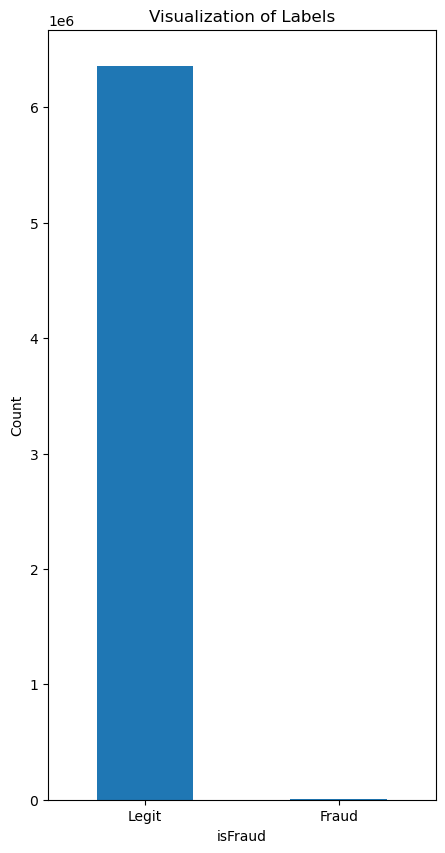

In [11]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

problem solving 




In [12]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [14]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


MULTICOLINEARITY

In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.


In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

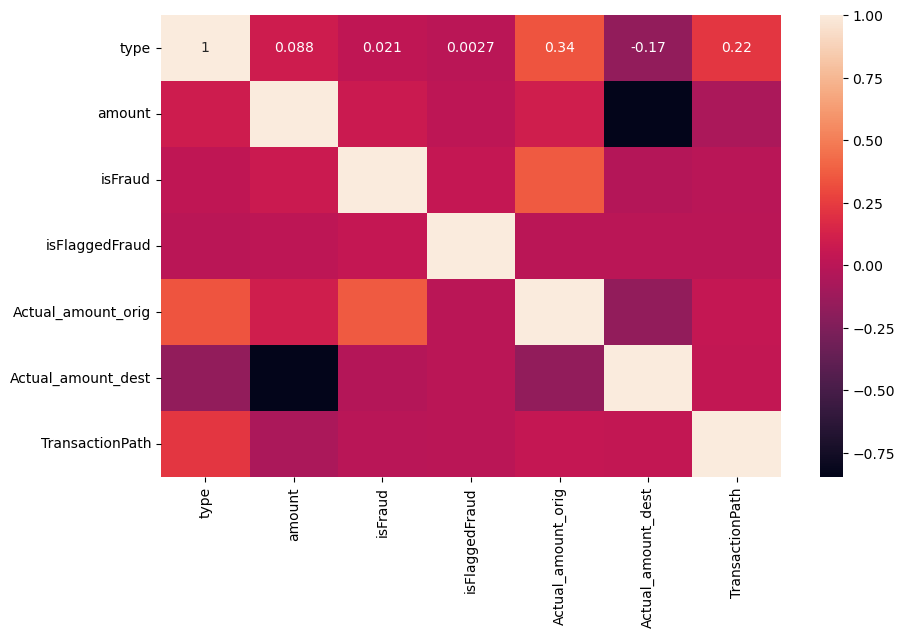

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

<br>How did you select variables to be included in the model?
<br>Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

    MODEL BUILDING

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

NORMALIZING (SCALING)AMOUNT

In [ ]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

I did not normalize the complete data set because it may lead to decrease in accuracy of model

TRAIN - TEST SPLIT

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


MODEL TRAINING

In [ ]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100



In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

EVALUATION

In [ ]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92193991364144
Random Forest Score:  99.95887438403257


In [ ]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1716
False Positives: 771
True Negatives: 1905580
False Negatives: 719
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1713
False Positives: 63
True Negatives: 1906288
False Negatives: 722


<br>TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
<br>FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
<br>TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
<br>FN(Decision Tree) ~ FN(Random Forest)

<br> Here Random Forest looks good.

In [ ]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905580     771]
 [    719    1716]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906288      63]
 [    722    1713]]


In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.84      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



with such good precision and hence f1-score ,random forest comes out to be better as expected

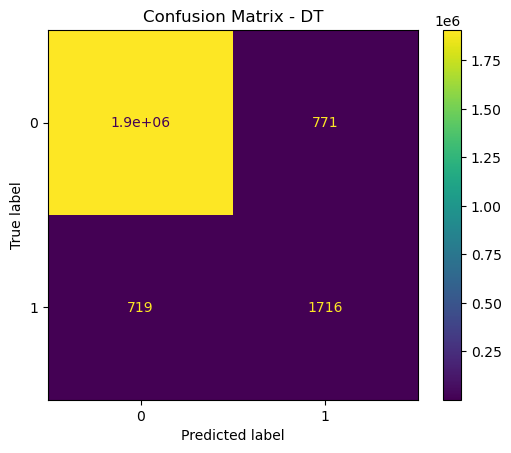

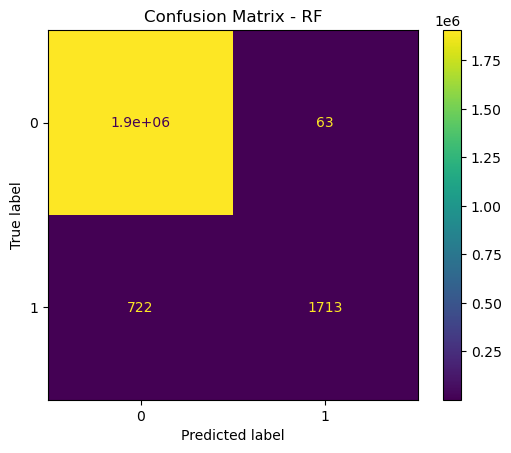

In [ ]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

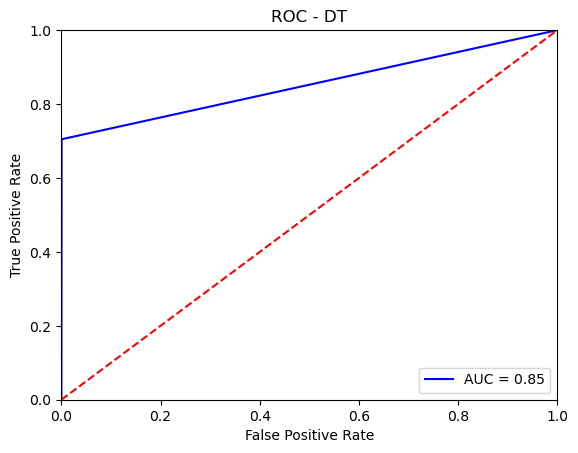

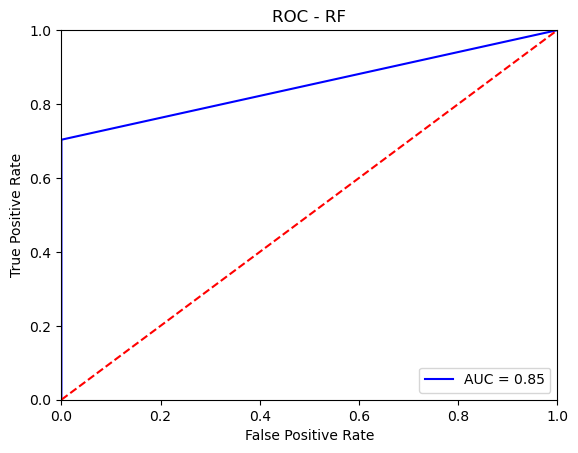

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.


## CONCLUSION

<br>We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
<br>This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.

<br>Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

<br>Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

What are the key factors that predict fraudulent customer?
1. The source of request is secured or not ?
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.

What kind of prevention should be adopted while company update its infrastructure?
1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails).
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?
1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
4. Always keep a log of your payments.

<Response [200]>
b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>ML and AI-based insurance premium model to predict premium to be charged by the insurance company - Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\n\t<!-- This site is optimized with the Yoast SEO plugin v23.2 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<link rel="canonical" href="https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/" />\n\t<meta property="og:locale" 
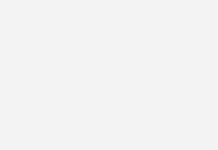
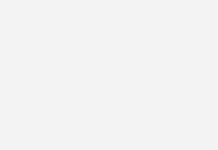
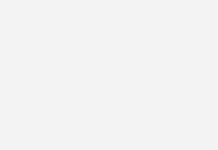
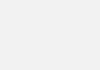
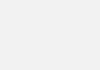
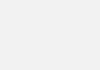
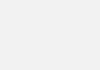
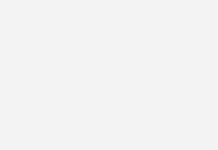
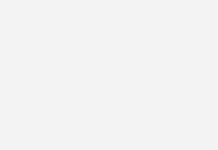
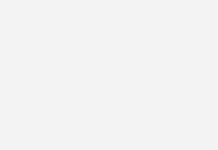
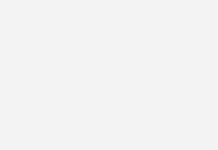

In [ ]:
import requests

# Making a GET request
r = requests.get('https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/')

# check status code for response received
# success code - 200
print(r)

# print content of request
print(r.content)

In [ ]:

from lxml import html
import requests

# Define the URL of the website to scrape
url = 'https://example.com'

# Send an HTTP request to the website and retrieve the HTML content
response = requests.get(url)

# Parse the HTML content using lxml
tree = html.fromstring(response.content)

# Extract specific elements from the HTML tree using XPath
# For example, let's extract the titles of all the links on the page
link_titles = tree.xpath('//a/text()')

# Print the extracted link titles
for title in link_titles:
    print(title)


More information...


<!doctype html >
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head>
    <title>ML and AI-based insurance premium model to predict premium to be charged by the insurance company - Blackcoffer Insights</title>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />
    <meta name='robots' content='index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1' />

	<!-- This site is optimized with the Yoast SEO plugin v23.2 - https://yoast.com/wordpress/plugins/seo/ -->
	<link rel="canonical" href="https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/" />
	<meta property="og:locale" content="en_US" />
	<meta property="og:type" content="art
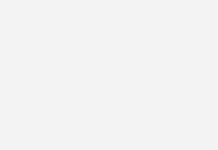
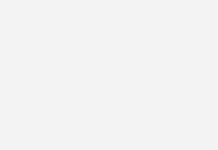
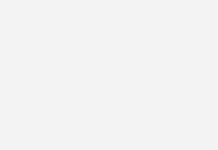
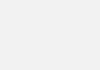
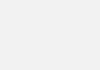
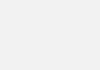
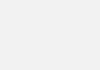
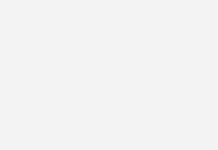
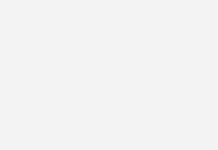
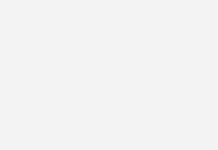
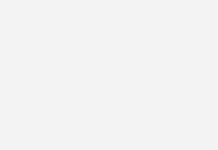

In [ ]:
import urllib.request

# URL of the web page to fetch
url = 'https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/'

try:
    # Open the URL and read its content
    response = urllib.request.urlopen(url)
    
    # Read the content of the response
    data = response.read()
    
    # Decode the data (if it's in bytes) to a string
    html_content = data.decode('utf-8')
    
    # Print the HTML content of the web page
    print(html_content)

except Exception as e:
    print("Error fetching URL:", e)


In [ ]:
import requests
import pandas as pd
import numpy as np
from time import sleep
from random import randint
from bs4 import BeautifulSoup

# VARIABLE TO DEFINE A RANGE BASED ON NO.OF PAGES
pages = np.arange(1, 2)

# DEFINING CUSTOM VARIABLES
author_and_dates_=[]
title_blognames_links_ = []

# LOOP TO RETRIEVE TITLE, BLOG NAMES, LINKS, AUTHORS AND DATE PUBLISHED
for page in pages:
    
    page="https://www.bartonassociates.com/blog/tag/Infographics/p" + str(page) 
    sleep(randint(2,10))
    soup = BeautifulSoup(requests.get(page).content, 'html.parser')
     
    #Information on title, blog names and their links
    for h4 in soup.select("h4"):
        for h2 in soup.select("h2"):
            title_blognames_links_.append((h4.get_text(strip=True), h4.a["href"], h2.get_text(strip=True)[11:]))
        
    #Information of authors and dates
    for tag in soup.find_all(class_="author"):
        author_and_dates_.append(tag.get_text(strip=True))

In [ ]:
new = []

# LOOP TO RETRIEVE TITLE, BLOG NAMES, LINKS, AUTHORS AND DATE PUBLISHED
for page in pages:
    
    page="https://www.bartonassociates.com/blog/tag/Infographics/p" + str(page) 
    sleep(randint(2,10))
    soup = BeautifulSoup(requests.get(page).content, 'html.parser')


    for h4 in soup.select("h4"):
        new.append((h4.get_text(strip=True), h4.a["href"])[1])

for link in new:
    link_soup = BeautifulSoup(requests.get(link).content, 'html.parser')

    for p in link_soup.select("div.cf > p"):
        print(p.get_text(strip=True))

In [ ]:
import pyautogui


# moves to (519,1060) in 1 sec
pyautogui.moveTo(519, 1060, duration = 1)

# simulates a click at the present 
# mouse position 
pyautogui.click()

# moves to (1717,352) in 1 sec
pyautogui.moveTo(1717, 352, duration = 1) 

# simulates a click at the present 
# mouse position
pyautogui.click()


ModuleNotFoundError: No module named 'pyautogui'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a request to the website
url = 'https://slogix.in/source-code/python/programming-samples/how-to-write-scraped-data-into-csv-file-in-python/'  # Replace with the URL you want to scrape
response = requests.get(url)
html_content = response.content

# Step 2: Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract data
data = []
table = soup.find('table')  # Adjust the tag and attributes as needed
rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Step 4: Convert data to DataFrame
df = pd.DataFrame(data, columns=['Column1', 'Column2', 'Column3'])  # Adjust column names as needed

# Step 5: Save data to CSV
df.to_csv('scraped_data.csv', index=False)


AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
# List of URLs to scrape
urls = [
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#deligibility',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dsyllabus',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dfaculty',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#doverview',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dbenefits',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dfaculty',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dinstitute',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dcareer',
    'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dfeestructure'
]


In [ ]:
page = requests.get(url)

In [ ]:
soup = BeautifulSoup(page.text, 'html')

In [ ]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<title>Doctor of business administration - TalentEdge</title>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-TZPTW4F');</script>
<!-- End Google Tag Manager -->
<meta content="Enhance your career with best online certification courses and online professional certificate programs for working professionals at TalentEdge." name="description"/>
<link href="https://talentedge.com/golden-gate-university/doctor-of-business-administration " rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="website" property="og:type"/>
<meta content="Doctor of business administration - TalentEdge" property="og:tit

In [ ]:
data = {
    'Overview': soup.find('div', { 'overview'}).class.strip(),
    'Benefits': soup.find('div', { 'benefits'}).class.strip(),
    'Eligibility': soup.find('div', { 'eligibility'}).class.strip(),
    'Syllabus': soup.find('div', { 'syllabus'}).class.strip(),
    'Faculty': soup.find('div', { 'faculty'}).class.strip(),
    'Institute': soup.find('div', { 'institute'}).class.strip(),
    'Review': soup.find('div', { 'review'}).class.strip(),
    'Tuition and Financing': soup.find('div', { 'tuition-financing'}).class.strip()
}


SyntaxError: invalid syntax (3836788925.py, line 2)

In [ ]:
data = {
    'Overview': soup.find('div', {'id': 'overview'}).text.strip(),
    'Benefits': soup.find('div', {'id': 'benefits'}).text.strip(),
    'Eligibility': soup.find('div', {'id': 'eligibility'}).text.strip(),
    'Syllabus': soup.find('div', {'id': 'syllabus'}).text.strip(),
    'Faculty': soup.find('div', {'id': 'faculty'}).text.strip(),
    'Institute': soup.find('div', {'id': 'institute'}).text.strip(),
    'Review': soup.find('div', {'id': 'review'}).text.strip(),
    'Tuition and Financing': soup.find('div', {'id': 'tuition-financing'}).text.strip()
}


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = 'https://talentedge.com/golden-gate-university/doctor-of-business-administration'  # Replace with the URL you want to scrape
response = requests.get(url)
html_content = response.content


In [ ]:
soup = BeautifulSoup(html_content, 'html.parser')


In [ ]:
data = []
table = soup.find('table')  # Adjust the tag and attributes as needed
rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)


AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a request to the website
url = 'https://talentedge.com/golden-gate-university/doctor-of-business-administration#dcareer'  # Replace with the URL you want to scrape
response = requests.get(url)
html_content = response.content

# Step 2: Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract data
data = []
headings = soup.find_all('h2')  # Adjust the tag as needed

for heading in headings:
    data.append(heading.text.strip())

# Step 4: Convert data to DataFrame
df = pd.DataFrame(data, columns=['Heading'])  # Adjust column name as needed

# Step 5: Save data to CSV
df.to_csv('scraped_data.csv', index=False)


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send a request to the website
url = 'https://talentedge.com/golden-gate-university/doctor-of-business-administration'
response = requests.get(url)
html_content = response.content

# Step 2: Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract data
data = {
    'Overview': soup.find('div', {'id': 'overview'}).text.strip(),
    'Benefits': soup.find('div', {'id': 'benefits'}).text.strip(),
    'Eligibility': soup.find('div', {'id': 'eligibility'}).text.strip(),
    'Syllabus': soup.find('div', {'id': 'syllabus'}).text.strip(),
    'Faculty': soup.find('div', {'id': 'faculty'}).text.strip(),
    'Institute': soup.find('div', {'id': 'institute'}).text.strip(),
    'Review': soup.find('div', {'id': 'review'}).text.strip(),
    'Tuition and Financing': soup.find('div', {'id': 'tuition-financing'}).text.strip()
}

# Step 4: Convert data to DataFrame
df = pd.DataFrame([data])

# Step 5: Save data to CSV
df.to_csv('scraped_data.csv', index=False)


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
url = 'https://talentedge.com/golden-gate-university/doctor-of-business-administration'
response = requests.get(url)
html_content = response.content


In [ ]:
soup = BeautifulSoup(html_content, 'html.parser')


In [ ]:
data = {
    'Overview': soup.find('div', { 'overview'}).class.strip(),
    'Benefits': soup.find('div', { 'benefits'}).class.strip(),
    'Eligibility': soup.find('div', { 'eligibility'}).class.strip(),
    'Syllabus': soup.find('div', { 'syllabus'}).class.strip(),
    'Faculty': soup.find('div', { 'faculty'}).class.strip(),
    'Institute': soup.find('div', { 'institute'}).class.strip(),
    'Review': soup.find('div', { 'review'}).class.strip(),
    'Tuition and Financing': soup.find('div', { 'tuition-financing'}).class.strip()
}


SyntaxError: invalid syntax (3836788925.py, line 2)

In [ ]:
import requests

# Making a GET request
r = requests.get('https://lms.learnandbuild.in/myaccount/#/course/113753/classrecords?class_id=293129&lesson=121404&section=289750&subject=293129')

# check status code for response received
# success code - 200
print(r)

# print content of request
print(r.content)


<Response [200]>
b'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <title></title>\n    <meta name="description" content="" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <!-- <meta http-equiv="Content-Security-Policy" content="upgrade-insecure-requests"> -->\n    <script\n      defer\n      src="https://cdn.jsdelivr.net/npm/summernote@0.8.20/dist/summernote.min.js"\n    ></script>\n    <!-- <meta name="google-signin-client_id" content="403925975394-15n3dke3n5kd7v4ndjshcnbbbckg3sd8.apps.googleusercontent.com"> -->\n    <script>\n      var hostName = location.hostname;\n      var endPoint = "/nuSource/api/v1/";\n      var apiEndHost = hostName;\n      var isKlassroom = hostName === "www.klassroom.in";\n      var isKlassroomTest = hostName === "klassroom.edupanion.com";\n      var isKlassroomKonnect = hostName.indexOf("klassroom") !== -1;\n      var isPremierTuition = ho